# <b>Final Python code notebook: Malaria Detection | Deep Learning

## <b>Problem Definition</b>

Malaria is one of the most dangerous contagious diseases in the world. OMS estimated that in 2020, 241 million people will have contracted Malaria. The Plasmodium is the parasite responsible for this disease. The parasite is transmitted by the bite of infected female mosquitoes. Oxygen-carrying cells called red blood cells (RBCs) are damaged by the parasite, which can lead to respiratory failure. 
In order to better struggle against the disease, it is necessary to be able to detect it as early as possible. In many cases, the presence of the virus does not immediately cause symptoms. So many infected people do not receive early care. Only a blood test can detect the presence of the virus before the dangerous symptoms occur. The detection of the parasite in the blood can take time and it requires an expert able to interpret the results.
Algorithms based on artificial intelligence and machine learning are very effective to solve classification problems. Applying these methods could allow to make a diagnosis faster and more efficiently than a doctor could do. Objectif of this work is to detect the existence of the parasite in the blood of a patient. We build a classification algorithm to know if the image cell is infected or not. The model is created using deep learning. 


## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import os

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### <b>Let us load the data</b>

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [ ]:
# Shape of images
print('Shape test image:',test_images.shape,'Shape train image:',train_images.shape)


Shape test image: (2600, 64, 64, 3) Shape train image: (24958, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [ ]:
# Shape of labels 
print('Shape test label:',test_labels.shape,'Shape train label:',train_labels.shape)


Shape test label: (2600,) Shape train label: (24958,)


#### <b> Observations and insights: 

- The size of the image in this dataset 64x64x3
- There are 24 958 data train examples
- There are 2 600 data test examples

### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy
min_value_train = train_images.min()
max_value_train = train_images.max()

min_value_test = test_images.min()
max_value_test = test_images.max()



#### <b> Observations and insights:    

In [ ]:
print(f'The maximun value of the train images is the maximun value of the train images is {max_value_train}')

print(f'The minimun value of the train images is the maximun value of the train images is {min_value_train}')

print(f'The maximun value of the train images is the maximun value of the train images is {max_value_test}')

print(f'The minimun value of the train images is the maximun value of the train images is {min_value_test}') 

The maximun value of the train images is the maximun value of the train images is 255
The minimun value of the train images is the maximun value of the train images is 0
The maximun value of the train images is the maximun value of the train images is 255
The minimun value of the train images is the maximun value of the train images is 0


### <b> Count the number of values in both uninfected and parasitized 

In [ ]:
# Try to use value_counts to count the values
pd.Series(train_labels).value_counts()

1    12582
0    12376
dtype: int64

In [ ]:
pd.Series(test_labels).value_counts()

1    1300
0    1300
dtype: int64

### <b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images).astype('float32') / 255

test_images = (test_images).astype('float32') / 255

#### <b> Observations and insights:
- In the train dataset, numbers of parasitized and unparasitized cell images is respectively **12582** and **12376**. This imbalance is slight, it can be taken into account when we train the neural network.
- In the test dataset, the number of parasitized and unparasitized cell images is **1300**.


### <b>Data Exploration</b>
Let's visualize the images from the train data

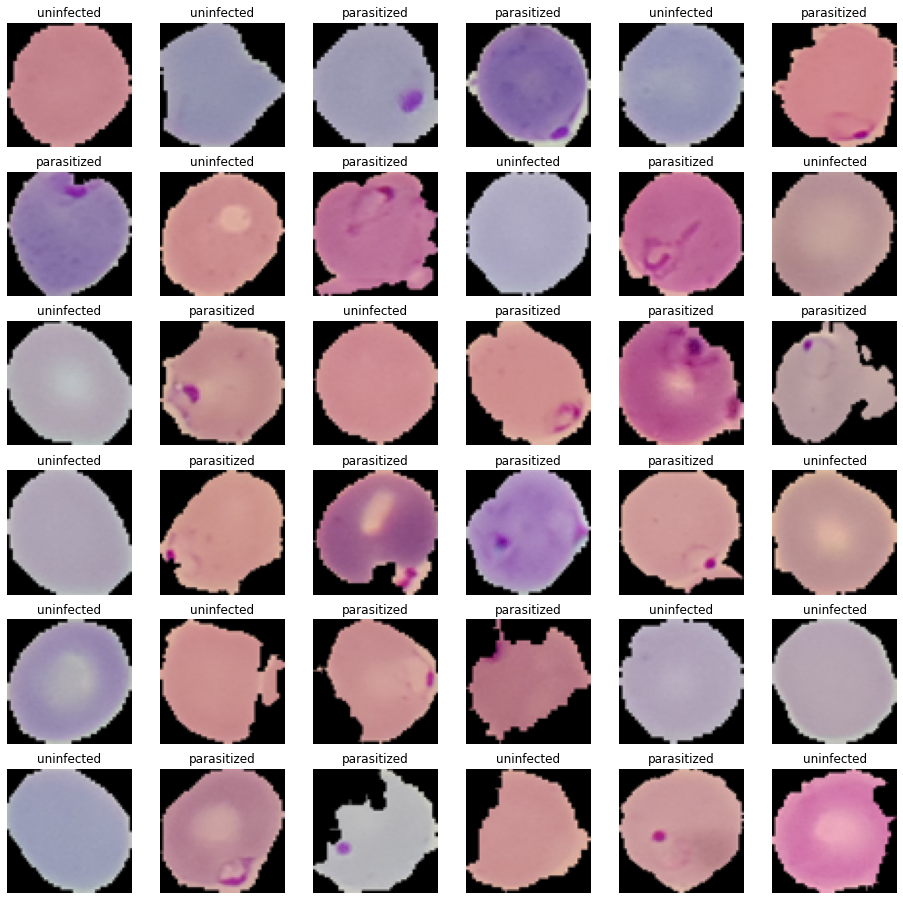

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1,37):
    plt.subplot(6,6,n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

###  <b> Observations and insights: 
    
- The image showing uninfected cell has some dark pink spot whereas the image showing parasited cell does't have some dark spot.

### <b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

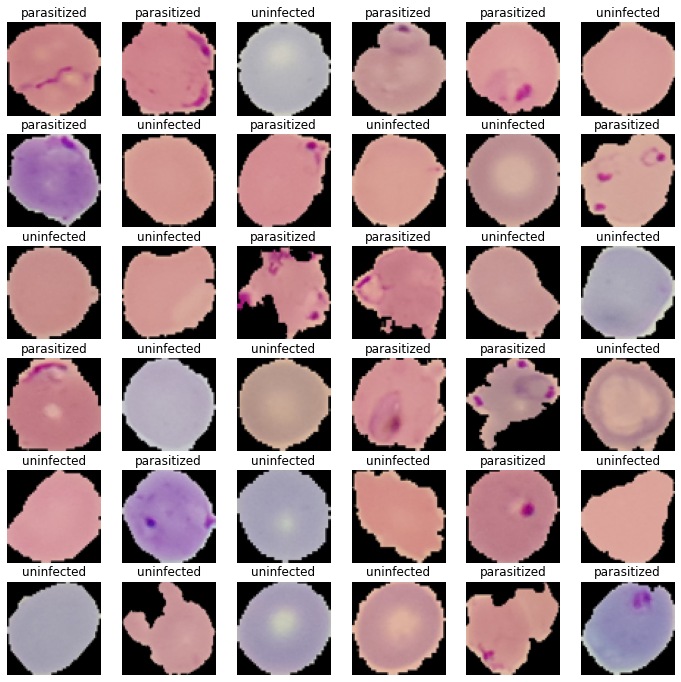

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate
np.random.seed(30)

plt.figure(1, figsize = (12 , 12))

for n in range(1,37):
    plt.subplot(6,6,n)
    
    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index], cmap = 'Greys_r')

    plt.axis('off')
    


####  <b> Observations and insights:
- The image showing uninfected cell has some dark pink spot whereas the image showing parasited cell does't have some dark spot.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

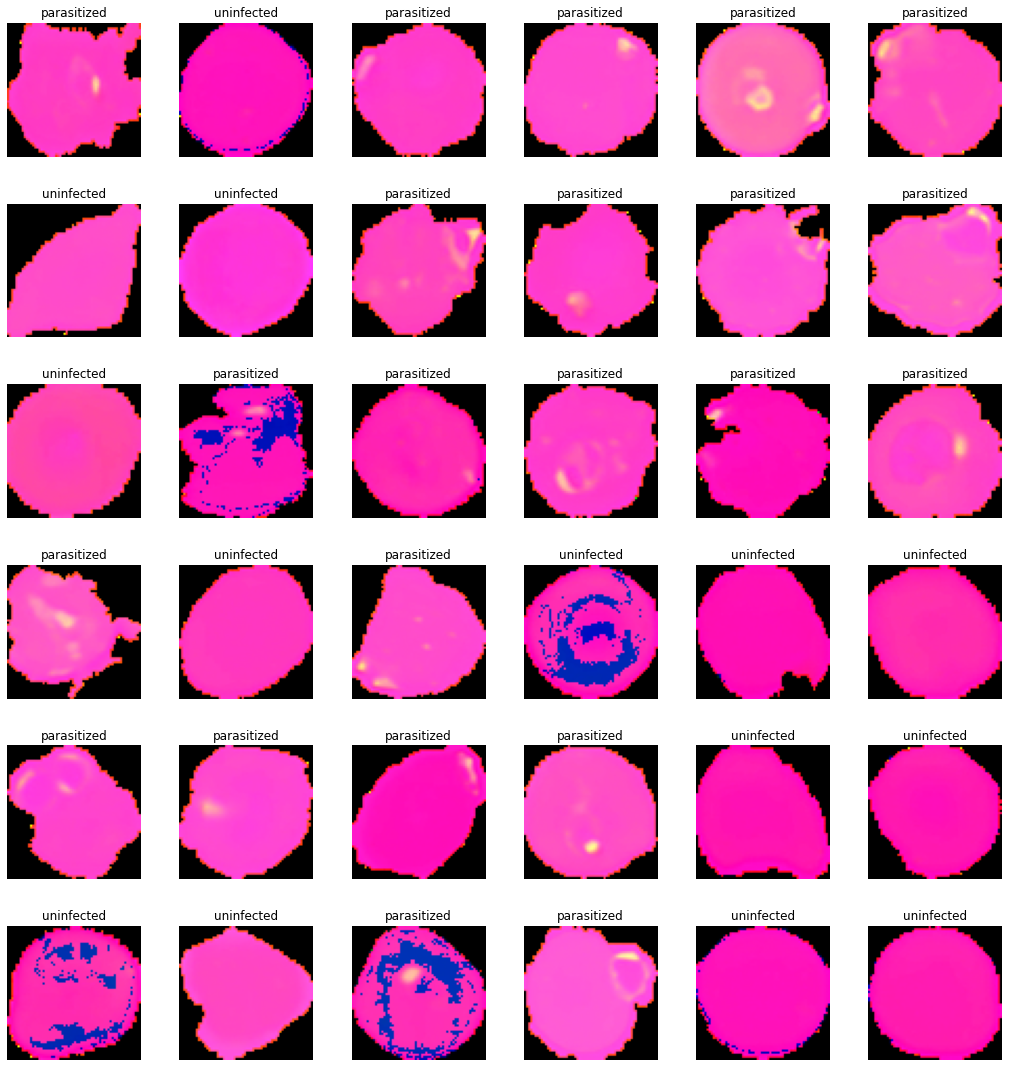

In [ ]:
np.random.seed(30)


viewimage = np.random.randint(1, 100, 36)

fig, ax = plt.subplots(6,6 ,figsize = (18, 18))

cc = 0
for i in range(6):
    for j in range(6):
        
        index = int(np.random.randint(0, train_images.shape[0], 1))
        a = cv2.cvtColor(train_images[index], cv2.COLOR_BGR2HSV)
        if train_labels[index] == 1: 
            Title = 'parasitized'
        else:
            Title = 'uninfected'

        ax[i][j].set_title(Title)

        ax[i][j].imshow(a)

        ax[i][j].set_axis_off()

        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        
        plt.show

### <b> Converting the test data

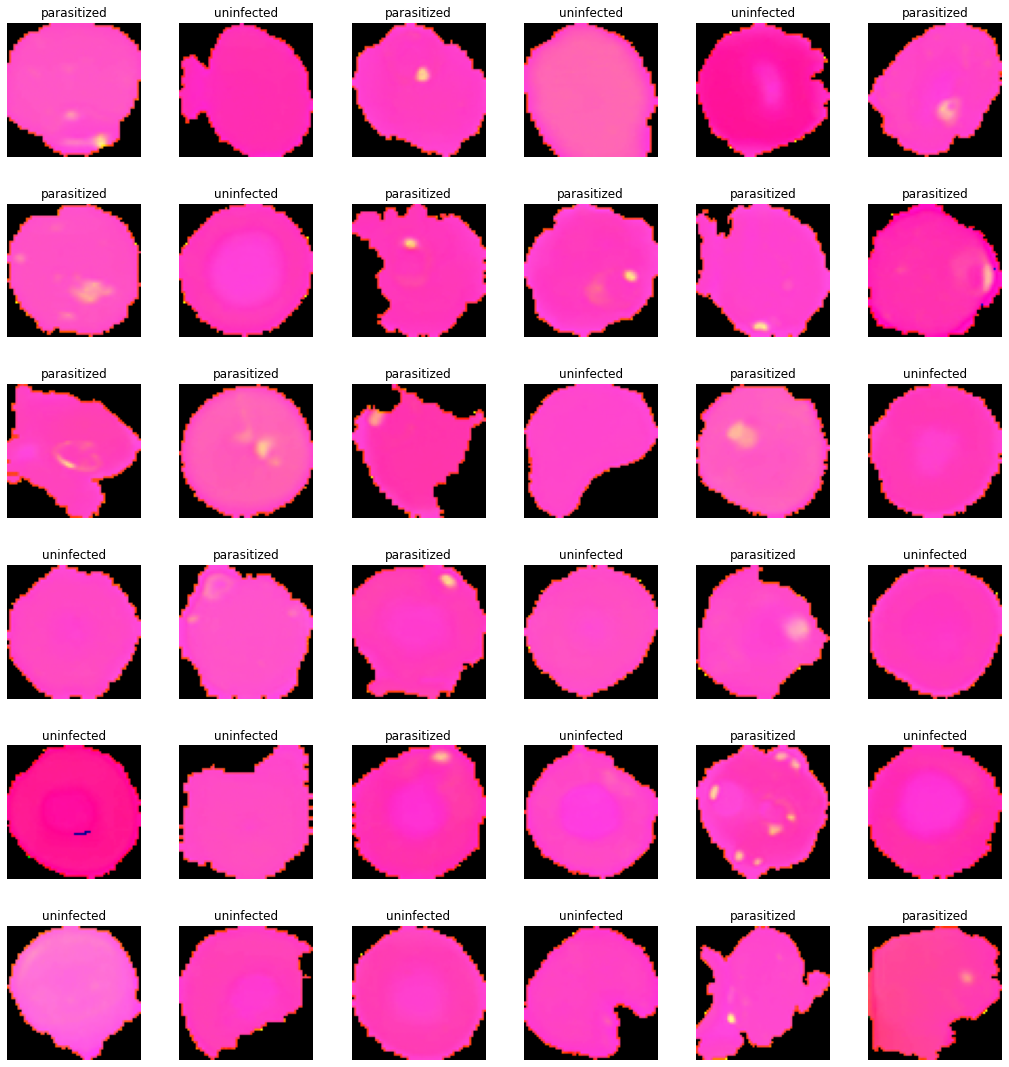

In [ ]:
# Similarly you can visualize for the images in the test data
np.random.seed(30)


viewimage = np.random.randint(1, 100, 36)

fig, ax = plt.subplots(6,6 ,figsize = (18, 18))

cc = 0
for i in range(6):
    for j in range(6):
        
        index = int(np.random.randint(0, test_images.shape[0], 1))
        a = cv2.cvtColor(test_images[index], cv2.COLOR_BGR2HSV)
        if test_labels[index] == 1: 
            Title = 'parasitized'
        else:
            Title = 'uninfected'

        ax[i][j].set_title(Title)

        ax[i][j].imshow(a)

        ax[i][j].set_axis_off()

        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        
        plt.show

#### <b>Observations and insights:

- Red parasitized blood can be identified by the presence of small yellow spots.
- Healthy cells do not contain this type of spot. Par contre, however, they sometimes contain blue spots.

## **Proposed approach**

Convolutional neural network is more efficient to deal this classification problem than fully connected neural network. As we have seen before, pink spots can be located anywhere in the image. Performance of convolutional Neural Network is not affected by the position of object whereas fully connected neural network doesn’t have this property. 
The number of train images could be insufficient to build a powerful neural for medical applications. Data augmentation techniques can provide some additional training data by transforming the original data with image retouching. Gaussian blurring is a technique to blur image. It can be used to add new images to the training database to improve the performance of neural network. Especially in our case, image obtained from microscope can easily be blurred by the experimental instrument. Therefore, it’s reasonable to consider using this technique.

There are other techniques of data augmentation like Geometric transformations. Training images can be randomly flipped, cropped or rotated and then adding them in the training dataset. All these methods of data augmentation can be used to deal the lack of training data.

We suggest to use convolutional neural network to build a classifier machine learning to evaluate if a cell has been infected by the Plasmodium parasite or not. We will start by creating a small CNN. If the model is underfitting the training data, we will build a CNN bigger than before or we will use data augmentation techniques seen previously. If the model is overfitting, we plan to use method of regularisation like dropout.
Classifying a person with no infected cell as having infected cell is less severe than classifying a person with infected cell as having no infected cell because the former case can be caught in next stage clinical trials but the later case might go untreated and can prove fatal for the person. But model takes care of both these cases. We use accuracy and recall to assess performance of classification model.



### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

As we have done our preprocessing required and performed some EDA to gain some insights in our Milestone-1 so now we will try to build our model and try evaluating its performance.

###  <B>One Hot Encoding on the train and test labels

In [ ]:
# Encoding Train Labels
train_labels = to_categorical(train_labels, 2)

# Similarly let us try to encode test labels
test_labels = to_categorical(test_labels, 2)

### **Base Model: Initial model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

### <b> Importing the required libraries for building and training our Model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU, BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### <b> Building the model

In [ ]:
# Creating sequential model
model = Sequential()

# First CNN block
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

# Second CNN block
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

# Third CNN block
model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

# Flattening layer
model.add(Flatten())

# First fully connected layer
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.4))

# Classifier
model.add(Dense(2, activation = "sigmoid")) # 2 represents output layer neurons 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

### <b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks 

In [ ]:
# The options "mode = 'min'" is added by me
callbacks = [EarlyStopping(monitor = 'val_loss' , mode = 'min', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', mode = 'min', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 8s 8ms/step - loss: 0.4043 - accuracy: 0.8012 - val_loss: 0.2360 - val_accuracy: 0.8774
Epoch 2/20
624/624 [==============================] - 5s 7ms/step - loss: 0.1233 - accuracy: 0.9543 - val_loss: 0.1628 - val_accuracy: 0.9780
Epoch 3/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0918 - accuracy: 0.9695 - val_loss: 0.1209 - val_accuracy: 0.9814
Epoch 4/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0793 - accuracy: 0.9741 - val_loss: 0.0515 - val_accuracy: 0.9904
Epoch 5/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0712 - accuracy: 0.9752 - val_loss: 0.0729 - val_accuracy: 0.9852
Epoch 6/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0706 - accuracy: 0.9759 - val_loss: 0.0760 - val_accuracy: 0.9828


### <b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0805 - accuracy: 0.9792

 Test_Accuracy:- 0.9792307615280151


<b> Generate the classification report and confusion matrix 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



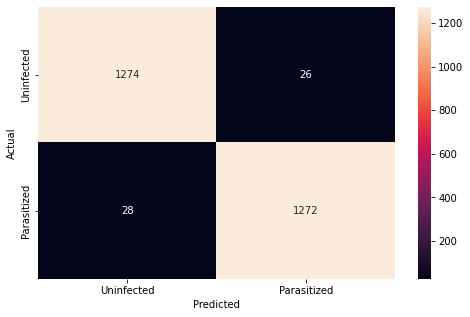

In [ ]:
pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")
    
    plt.xlabel("Epochs")
    
    plt.ylabel("Accuracy")
    
    plt.legend(loc="upper left")

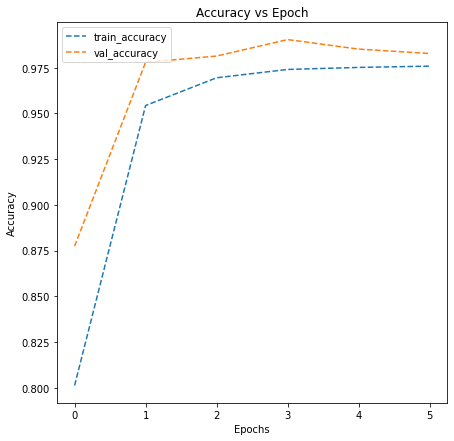

In [ ]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1 : Model depth 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()

# First CNN block
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

# Second CNN block
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

# Third CNN block
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

# Fifth CNN block
model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))

# Flattening layer
model1.add(Flatten())

# First fully connected layer
model1.add(Dense(512, activation = "relu"))
model1.add(Dropout(0.4))

# Classifier
model1.add(Dense(2, activation = "sigmoid")) # 2 represents output layer neurons 

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

###<b> Compiling the model

In [ ]:
# Compiling the model
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

<b> Using Callbacks

In [ ]:
# The options "mode = 'min'" is added by me
callbacks = [EarlyStopping(monitor = 'val_loss' , mode = 'min', patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', mode = 'min', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size = 64, callbacks = callbacks,  validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 5s 13ms/step - loss: 0.4912 - accuracy: 0.7488 - val_loss: 0.1810 - val_accuracy: 0.9788
Epoch 2/20
312/312 [==============================] - 4s 13ms/step - loss: 0.1092 - accuracy: 0.9627 - val_loss: 0.1623 - val_accuracy: 0.9744
Epoch 3/20
312/312 [==============================] - 4s 12ms/step - loss: 0.0856 - accuracy: 0.9718 - val_loss: 0.0743 - val_accuracy: 0.9830
Epoch 4/20
312/312 [==============================] - 4s 12ms/step - loss: 0.0796 - accuracy: 0.9736 - val_loss: 0.0412 - val_accuracy: 0.9902
Epoch 5/20
312/312 [==============================] - 4s 13ms/step - loss: 0.0744 - accuracy: 0.9748 - val_loss: 0.0783 - val_accuracy: 0.9800
Epoch 6/20
312/312 [==============================] - 4s 14ms/step - loss: 0.0688 - accuracy: 0.9770 - val_loss: 0.0481 - val_accuracy: 0.9866
Epoch 7/20
312/312 [==============================] - 4s 13ms/step - loss: 0.0687 - accuracy: 0.9773 - val_loss: 0.0528 - val_accuracy: 0.9818

###<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy1[1])

82/82 [==============================] - 1s 5ms/step - loss: 0.0581 - accuracy: 0.9827

 Test_Accuracy:- 0.982692301273346


<b> Generate the classification report and confusion matrix 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



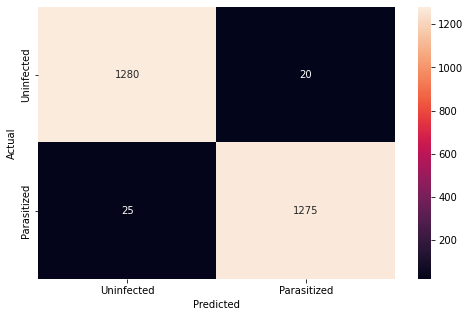

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1) 

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

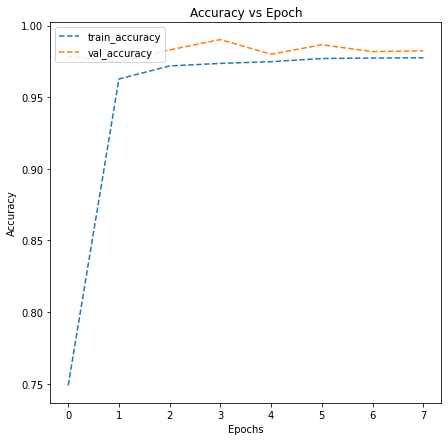

In [ ]:
plot_accuracy(history1)

###<b>  Model depth 2

In [ ]:
backend.clear_session() # Clearing the backend for new model

In [ ]:
# Creating sequential model
model1_1 = Sequential()

# First CNN block
model1_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model1_1.add(MaxPooling2D(pool_size = 2))
model1_1.add(Dropout(0.2))

# Second CNN block
model1_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1_1.add(MaxPooling2D(pool_size = 2))
model1_1.add(Dropout(0.2))

# Third CNN block
model1_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1_1.add(MaxPooling2D(pool_size = 2))
model1_1.add(Dropout(0.2))

# Fifth CNN block
model1_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1_1.add(MaxPooling2D(pool_size = 2))
model1_1.add(Dropout(0.2))

# Sixth CNN block
model1_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model1_1.add(MaxPooling2D(pool_size = 2))
model1_1.add(Dropout(0.2))

# Flattening layer
model1_1.add(Flatten())

# First fully connected layer
model1_1.add(Dense(512, activation = "relu"))
model1_1.add(Dropout(0.4))

# Classifier
model1_1.add(Dense(2, activation = "sigmoid")) # 2 represents output layer neurons 

model1_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [ ]:
# Compiling the model
model1_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

# The options "mode = 'min'" is added by me
callbacks = [EarlyStopping(monitor = 'val_loss' , mode = 'min', patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', mode = 'min', save_best_only = True)]

history1_1 = model1_1.fit(train_images, train_labels, batch_size = 64, callbacks = callbacks,  validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 5s 14ms/step - loss: 0.4168 - accuracy: 0.7872 - val_loss: 0.1076 - val_accuracy: 0.9808
Epoch 2/20
312/312 [==============================] - 4s 12ms/step - loss: 0.0952 - accuracy: 0.9677 - val_loss: 0.0983 - val_accuracy: 0.9754
Epoch 3/20
312/312 [==============================] - 4s 12ms/step - loss: 0.0797 - accuracy: 0.9734 - val_loss: 0.0594 - val_accuracy: 0.9830
Epoch 4/20
312/312 [==============================] - 4s 12ms/step - loss: 0.0753 - accuracy: 0.9755 - val_loss: 0.0634 - val_accuracy: 0.9782
Epoch 5/20
312/312 [==============================] - 4s 12ms/step - loss: 0.0729 - accuracy: 0.9756 - val_loss: 0.0712 - val_accuracy: 0.9746
Epoch 6/20
312/312 [==============================] - 4s 13ms/step - loss: 0.0699 - accuracy: 0.9774 - val_loss: 0.0608 - val_accuracy: 0.9778
Epoch 7/20
312/312 [==============================] - 4s 13ms/step - loss: 0.0725 - accuracy: 0.9761 - val_loss: 0.0564 - val_accuracy: 0.9790

###<b> Evaluating the model

<b> Generate the classification report and confusion matrix 

82/82 [==============================] - 1s 5ms/step - loss: 0.0516 - accuracy: 0.9800

 Test_Accuracy:- 0.9800000190734863
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



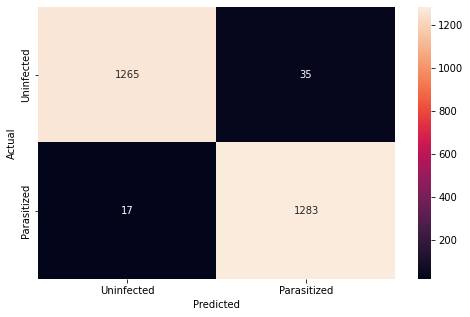

In [ ]:
name_model = model1_1
accuracy1 = name_model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy1[1])

# Plotting the confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = name_model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

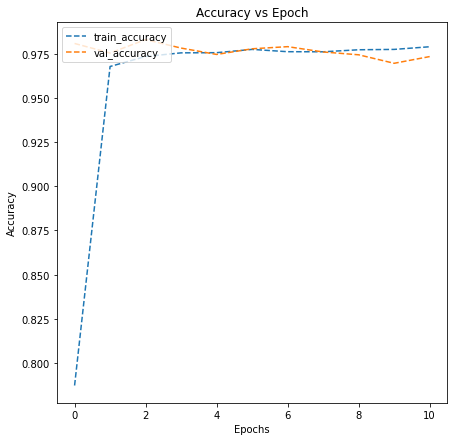

In [ ]:
plot_accuracy(history1_1)

###<b>  Model large

In [ ]:
backend.clear_session() # Clearing the backend for new model

In [ ]:
# Creating sequential model
model1_3 = Sequential()

# First CNN block
model1_3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model1_3.add(MaxPooling2D(pool_size = 2))
model1_3.add(Dropout(0.2))

# Second CNN block
model1_3.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))
model1_3.add(MaxPooling2D(pool_size = 2))
model1_3.add(Dropout(0.2))

# Third CNN block
model1_3.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
model1_3.add(MaxPooling2D(pool_size = 2))
model1_3.add(Dropout(0.2))

# Fifth CNN block
model1_3.add(Conv2D(filters = 128, kernel_size = 2, padding = "same", activation = "relu"))
model1_3.add(MaxPooling2D(pool_size = 2))
model1_3.add(Dropout(0.2))

# Sixth CNN block
model1_3.add(Conv2D(filters = 256, kernel_size = 2, padding = "same", activation = "relu"))
model1_3.add(MaxPooling2D(pool_size = 2))
model1_3.add(Dropout(0.2))

# Flattening layer
model1_3.add(Flatten())

# First fully connected layer
model1_3.add(Dense(512, activation = "relu"))

# Second fully connected layer
model1_3.add(Dense(256, activation = "relu"))


# Classifier
model1_3.add(Dense(2, activation = "sigmoid")) # 2 represents output layer neurons 

model1_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [ ]:
# Compiling the model
model1_3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

# The options "mode = 'min'" is added by me
callbacks = [EarlyStopping(monitor = 'val_loss' , mode = 'min', patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', mode = 'min', save_best_only = True)]

history1_3 = model1_3.fit(train_images, train_labels, batch_size = 64, callbacks = callbacks,  validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 7s 19ms/step - loss: 0.3909 - accuracy: 0.7935 - val_loss: 0.1006 - val_accuracy: 0.9742
Epoch 2/20
312/312 [==============================] - 5s 16ms/step - loss: 0.0892 - accuracy: 0.9713 - val_loss: 0.0851 - val_accuracy: 0.9702
Epoch 3/20
312/312 [==============================] - 5s 16ms/step - loss: 0.0753 - accuracy: 0.9749 - val_loss: 0.0630 - val_accuracy: 0.9790
Epoch 4/20
312/312 [==============================] - 5s 16ms/step - loss: 0.0703 - accuracy: 0.9768 - val_loss: 0.0518 - val_accuracy: 0.9782
Epoch 5/20
312/312 [==============================] - 5s 17ms/step - loss: 0.0715 - accuracy: 0.9768 - val_loss: 0.0865 - val_accuracy: 0.9647
Epoch 6/20
312/312 [==============================] - 5s 17ms/step - loss: 0.0702 - accuracy: 0.9777 - val_loss: 0.0704 - val_accuracy: 0.9764
Epoch 7/20
312/312 [==============================] - 5s 16ms/step - loss: 0.0650 - accuracy: 0.9785 - val_loss: 0.0524 - val_accuracy: 0.9758


### Evaluating the model

<b> Generate the classification report and confusion matrix 

82/82 [==============================] - 1s 5ms/step - loss: 0.0520 - accuracy: 0.9808

 Test_Accuracy:- 0.9807692170143127
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1300
           1       0.97      1.00      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



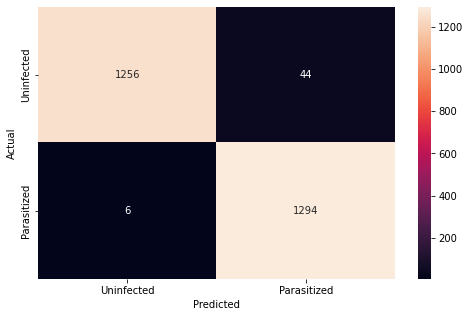

In [ ]:
name_model = model1_3
accuracy1 = name_model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy1[1])

# Plotting the confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = name_model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

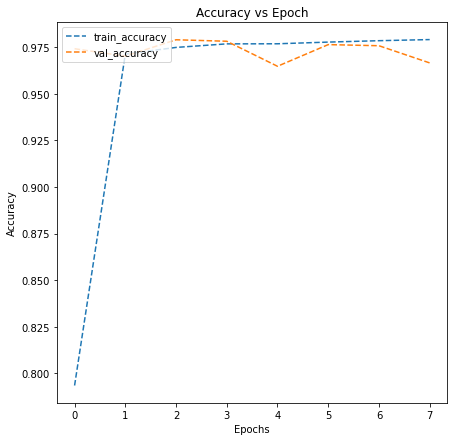

In [ ]:
plot_accuracy(history1_3)

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization: Model regu

In [ ]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [ ]:
# Creating sequential model
model2_1 = Sequential()

# First CNN block
model2_1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model2_1.add(LeakyReLU(0.1))
model2_1.add(BatchNormalization())
model2_1.add(MaxPooling2D(pool_size = 2))
model2_1.add(Dropout(0.2))

# Second CNN block
model2_1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same"))
model2_1.add(LeakyReLU(0.1))
model2_1.add(BatchNormalization())
model2_1.add(MaxPooling2D(pool_size = 2))
model2_1.add(Dropout(0.2))

# Third CNN block
model2_1.add(Conv2D(filters = 128, kernel_size = 2, padding = "same"))
model2_1.add(LeakyReLU(0.1))
model2_1.add(BatchNormalization())
model2_1.add(MaxPooling2D(pool_size = 2))
model2_1.add(Dropout(0.2))

# Fifth CNN block
model2_1.add(Conv2D(filters = 128, kernel_size = 2, padding = "same"))
model2_1.add(LeakyReLU(0.1))
model2_1.add(BatchNormalization())
model2_1.add(MaxPooling2D(pool_size = 2))
model2_1.add(Dropout(0.2))

# Sixth CNN block
model2_1.add(Conv2D(filters = 256, kernel_size = 2, padding = "same"))
model2_1.add(LeakyReLU(0.1))
model2_1.add(BatchNormalization())
model2_1.add(MaxPooling2D(pool_size = 2))
model2_1.add(Dropout(0.2))

# Flattening layer
model2_1.add(Flatten())

# First fully connected layer
model2_1.add(Dense(512))

# Second fully connected layer
model2_1.add(Dense(256))

# Classifier
model2_1.add(Dense(2, activation = "sigmoid")) # 2 represents output layer neurons 

model2_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        8

###<b>Compiling the model

In [ ]:
adam = optimizers.Adam(learning_rate = 0.001)
model2_1.compile(loss = "binary_crossentropy", optimizer = adam, metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 6),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', mode = 'min', save_best_only = True)]


<b>Fit and train the model

In [ ]:
history2_1 = model2_1.fit(train_images, train_labels, batch_size = 64, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 8s 21ms/step - loss: 0.4842 - accuracy: 0.8502 - val_loss: 0.0672 - val_accuracy: 1.0000
Epoch 2/20
312/312 [==============================] - 6s 19ms/step - loss: 0.1098 - accuracy: 0.9628 - val_loss: 0.2256 - val_accuracy: 0.9567
Epoch 3/20
312/312 [==============================] - 6s 19ms/step - loss: 0.0862 - accuracy: 0.9708 - val_loss: 0.1048 - val_accuracy: 0.9856
Epoch 4/20
312/312 [==============================] - 6s 19ms/step - loss: 0.0828 - accuracy: 0.9748 - val_loss: 0.0786 - val_accuracy: 0.9816
Epoch 5/20
312/312 [==============================] - 6s 19ms/step - loss: 0.0741 - accuracy: 0.9756 - val_loss: 0.1384 - val_accuracy: 0.9679
Epoch 6/20
312/312 [==============================] - 6s 20ms/step - loss: 0.0742 - accuracy: 0.9762 - val_loss: 0.0476 - val_accuracy: 0.9960
Epoch 7/20
312/312 [==============================] - 6s 19ms/step - loss: 0.0678 - accuracy: 0.9774 - val_loss: 0.0557 - val_accuracy: 0.9892

### Evaluating model

<b> Generate the classification report and confusion matrix 

82/82 [==============================] - 1s 6ms/step - loss: 0.0891 - accuracy: 0.9846

 Test_Accuracy:- 0.9846153855323792
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



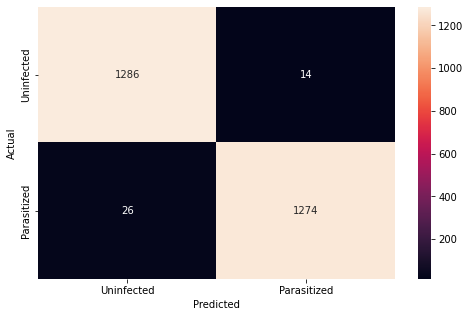

In [ ]:
name_model = model2_1
accuracy1 = name_model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy1[1])

# Plotting the confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = name_model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b>Plotting the train and validation accuracy

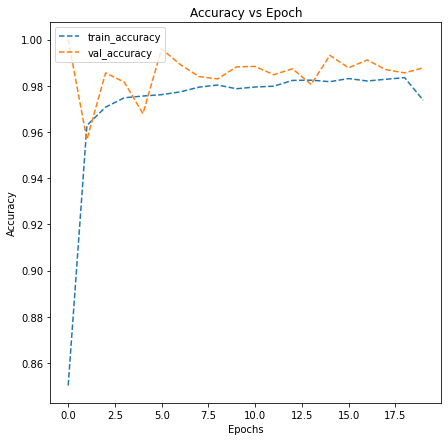

In [ ]:
# Plotting the accuracies
plot_accuracy(history2_1)

###<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy2_1 = model2_1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy2_1[1])

82/82 [==============================] - 0s 6ms/step - loss: 0.0891 - accuracy: 0.9846

 Test_Accuracy:- 0.9846153855323792


###<b>Model 3 with Data Augmentation: Model data aug

In [ ]:
backend.clear_session() # Clearing backend for new model

###<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True,
                                rotation_range = 30)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

####<B>Visualizing Augmented images

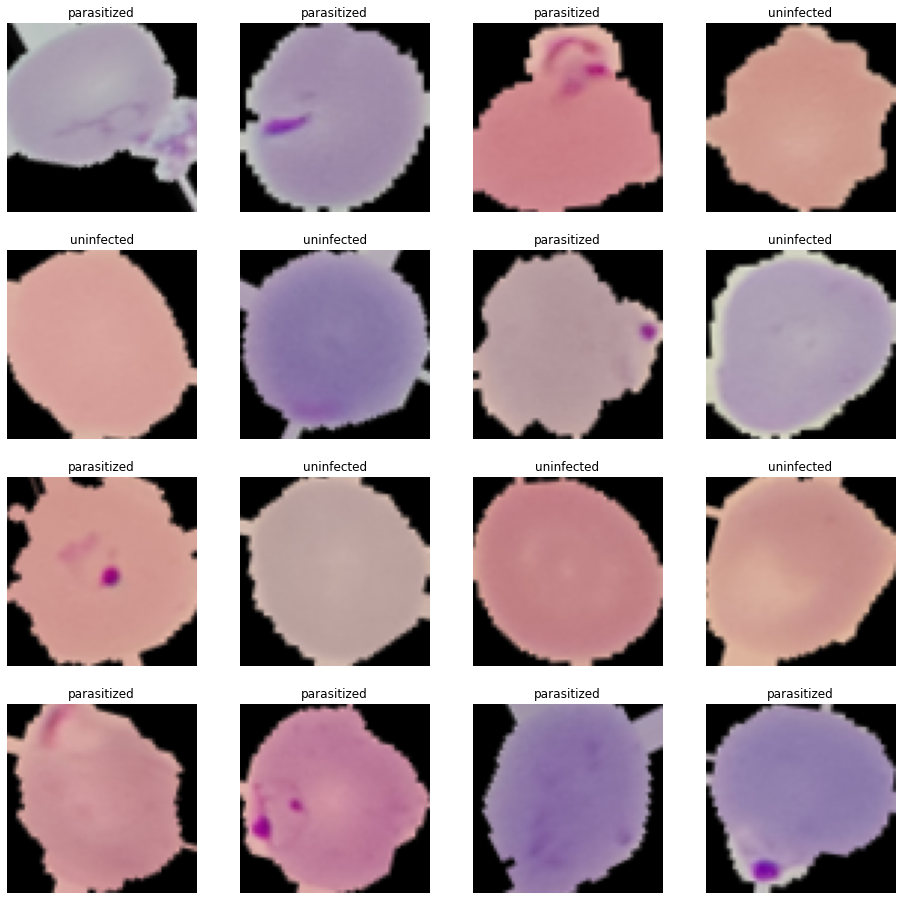

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1: 

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

#### <b> Observations and insights: <b>
- The new images seem to be identical to the original dataset images.From the point of view of the neural network, these images are not the same.Therefore, this technique should improve the results


###<b>Building the Model

In [ ]:
# Creating sequential model
model3 = Sequential()

# First CNN block
model3.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", input_shape = (64, 64, 3)))
model3.add(LeakyReLU(0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

# Second CNN block
model3.add(Conv2D(filters = 64, kernel_size = 2, padding = "same"))
model3.add(LeakyReLU(0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

# Third CNN block
model3.add(Conv2D(filters = 128, kernel_size = 2, padding = "same"))
model3.add(LeakyReLU(0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

# Fifth CNN block
model3.add(Conv2D(filters = 128, kernel_size = 2, padding = "same"))
model3.add(LeakyReLU(0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

# Sixth CNN block
model3.add(Conv2D(filters = 256, kernel_size = 2, padding = "same"))
model3.add(LeakyReLU(0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.2))

# Flattening layer
model3.add(Flatten())

# First fully connected layer
model3.add(Dense(512))

# Second fully connected layer
model3.add(Dense(256))

# Classifier
model3.add(Dense(2, activation = "sigmoid")) # 2 represents output layer neurons 

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        8

In [ ]:
# Compiling the model
adam = optimizers.Adam(learning_rate = 0.001)
model3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator, 
                                  validation_data = val_generator,
                                  batch_size = 64, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 26s 81ms/step - loss: 0.5275 - accuracy: 0.8117 - val_loss: 1.8498 - val_accuracy: 0.5044
Epoch 2/20
312/312 [==============================] - 24s 76ms/step - loss: 0.1149 - accuracy: 0.9653 - val_loss: 0.1008 - val_accuracy: 0.9690
Epoch 3/20
312/312 [==============================] - 23s 75ms/step - loss: 0.0945 - accuracy: 0.9712 - val_loss: 0.0681 - val_accuracy: 0.9780
Epoch 4/20
312/312 [==============================] - 23s 75ms/step - loss: 0.0915 - accuracy: 0.9724 - val_loss: 0.0781 - val_accuracy: 0.9792
Epoch 5/20
312/312 [==============================] - 23s 75ms/step - loss: 0.0871 - accuracy: 0.9738 - val_loss: 0.0647 - val_accuracy: 0.9802
Epoch 6/20
312/312 [==============================] - 23s 75ms/step - loss: 0.0810 - accuracy: 0.9739 - val_loss: 0.0606 - val_accuracy: 0.9808
Epoch 7/20
312/312 [==============================] - 23s 75ms/step - loss: 0.0773 - accuracy: 0.9754 - val_loss: 0.0739 - val_accuracy:

###<B>Evaluating the model

<b>Plot the train and validation accuracy

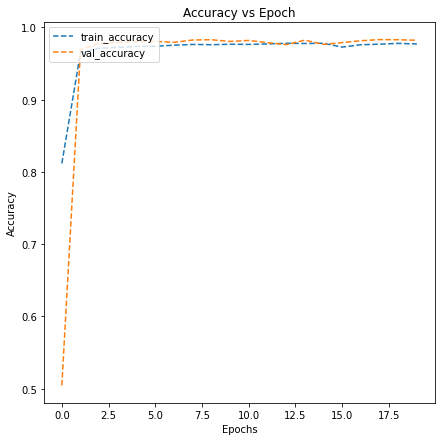

In [ ]:
# Potting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:-', accuracy3[1])

82/82 [==============================] - 1s 6ms/step - loss: 0.0673 - accuracy: 0.9881

 Test_Accuracy:- 0.98807692527771


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 1s 6ms/step - loss: 0.0673 - accuracy: 0.9881

 Test_Accuracy:- 0.98807692527771
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1300
           1       0.99      0.99      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



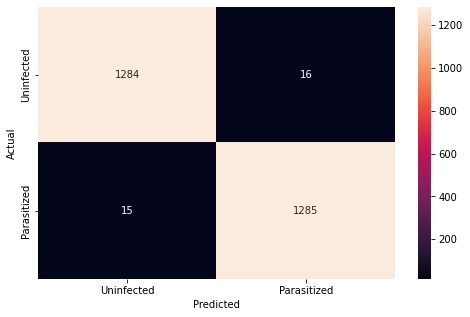

In [ ]:
name_model = model3
accuracy1 = name_model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy1[1])

# Plotting the confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = name_model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

####**Refined insights**:
- The aim of this work is to build a classification model using deep learning to predict if red blood cell in a image is infected by the parasite Plasmodium or not. Before building a machine learning model, it is necessary to have a global vision of the database in order to extract the relevant information. 
The images provided by the database clearly allow us to identify the difference between a healthy and a parasitized cell. The shape and background color of a cell is not a criterion to classify the image. On the other hand, the parasitized cells present dark pink spots that can be positioned anywhere on the cell whereas healthy cells do not have this characteristic. These spots do not seem to have a specific shape or color that characterizes them. They are identifiable by the fact that they clearly do not have the same color as the background of the cell. 
Since spots do not have a specific shape and size, it is possible that some spots are merging with the background of the cell. These spots might not be identified because they are not present in large enough quantity in the database to be perceived by the classifier as a spot. This would imply that a parasitized cell would be misclassified. The presence of intrusive elements can cause huge confusion problems. Indeed, as the spots do not have a specific shape, an intrusive element present in the cell can seriously trouble the classifier. This involves that a unparasitized cell would be misclassified.
As we have 27558 images, it seems that we have enough examples to classify most of the images. However, it is necessary that the database contains enough variety of images to be able to classify the images that have significant differences to the base images. The first results will be able to inform us if we have a bias problem. If this is the case, we will be able to provide solutions to deal with it.


####**Comparison of various techniques and their relative performance**:
- The test accuracy of the initial model is 0.992. The performance of this model is correct. Indeed, the test accuracy is 0.9792. Numbers of false positive and false negative respectively of 26 and 28. A small convolution network is able to learn well from this data set. As this algorithm is intended to be used in a medical environment, we need to improve these performances as much as possible.
The dept 1 model has a better test accuracy than the initial model whereas the dept 2 model does not. On the other hand, the number of false positives of the dept 2 model is better than that of the initial model. Increasing the depth of the neural network does not necessarily improve the performance of the algorithm.
The test accuracy of the model large is 0.9807. Numbers of false positive and false negative respectively of 6 and 44. This model has the particularity of having a high false negative rate. An infected patient may not be detected.
The accuracy of the model relu is 0.9846. Numbers of false positive and false negative respectively of 26 and 14. Accuracy Test and the number of false negative is better than the previous models . As the large model and the relu model are similar, we observe that using batch normalization as well as the use of Leaky Relu activation function has improved the performance of the large model. 
The test of accuracy of the model data aug is 0.9880. Numbers of false positive and false negative respectively of 15 and 16. This model has the best Test Accuracy. Moreover, the number of false negatives is very low. Data augmentation technique allowed to decrease the false positive rate. The false positive rate increased by 2. To improve the performance of this model, we could add other data augmentation techniques able to slightly modify the intensity of the color of the spots and aggregate theses models with baggins methods.

####**Proposal for the final solution design**:
Based on the comparison, the best model is the data aug model. It is the model that makes the fewest errors. Moreover, the number of false positive is almost similar to the model with the lowest number of false positive.  Before deploying this model in life. We must make sure that the database is representative of the population. If this is the case, this model can be used to increase the number of patients tested in order to better fight against malaria. It is necessary to create a method to evaluate the performance of this model on new data. If this model is not performing well on new data, the model will have to be changed and new data augmentation techniques will have to be developed.